<a href="https://colab.research.google.com/github/ptomar7/ptomar7/blob/main/High_Code_SVHN_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing the necessary libraries**

In [ ]:
import pandas as pd
import numpy as np

import random

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras import backend
from tensorflow.keras.losses import categorical_crossentropy




**Let us check the version of tensorflow.**

In [ ]:
print("Tensorflow version: ", tf.__version__)

Tensorflow version:  2.12.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [ ]:
import h5py

# Open the file as read only

h5data = h5py.File('/content/drive/MyDrive/MIT-Data Science/Elective Project/SVHN_single_grey1.h5', 'r')



In [ ]:

list(h5data.values())



[<HDF5 dataset "X_test": shape (18000, 32, 32), type "<f4">,
 <HDF5 dataset "X_train": shape (42000, 32, 32), type "<f4">,
 <HDF5 dataset "X_val": shape (60000, 32, 32), type "<f4">,
 <HDF5 dataset "y_test": shape (18000,), type "|u1">,
 <HDF5 dataset "y_train": shape (42000,), type "|u1">,
 <HDF5 dataset "y_val": shape (60000,), type "|u1">]

Observations:
- h5data file has information stored as dictionary (Key:value pair). There are following keys: ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [ ]:
# Load the training dataset

X_train = h5data['X_train'][:]

y_train = h5data['y_train'][:]

# Load the test dataset

X_test = h5data['X_test'][:]

y_test = h5data['y_test'][:]


# Close this file

h5data.close()

Check the number of images in the training and the testing dataset.

In [ ]:
print("Training dataset: ", X_train.shape, "Training Output dataset: ",y_train.shape, '\nTest input dataset: ', X_test.shape, 'Test output dataset: ', y_test.shape)

Training dataset:  (42000, 32, 32) Training Output dataset:  (42000,) 
Test input dataset:  (18000, 32, 32) Test output dataset:  (18000,)


In [ ]:
#number of images in the training and the testing dataset
print("Number of images stored in the trining dataset = ", len(X_train),'\n'\
      'Number of images stored in the testing dataset = ', len(X_test))

Number of images stored in the trining dataset =  42000 
Number of images stored in the testing dataset =  18000


**Observation:**
- Number of images stored in the trining dataset =  42000
- Number of images stored in the testing dataset =  18000

**Additional information:**
- Training dataset:  (42000, 32, 32) Training Output dataset:  (42000,)
- Test input dataset:  (18000, 32, 32) Test output dataset:  (18000,)

In [ ]:
print('Target unique values: ', np.unique(y_train))
X_train[0, :]

Target unique values:  [0 1 2 3 4 5 6 7 8 9]


array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

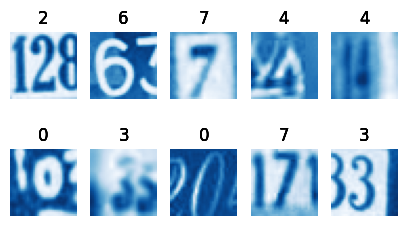

In [ ]:
num_classes=10                                                    # Number of Classes
categories=np.unique(y_train)                                     # Obtaing the unique classes from y_train
rows = 10                                                         # Defining number of rows=10
cols = 5                                                          # Defining number of columns=5
fig = plt.figure(figsize=(5, 15))                                 # Defining the figure size to 10x5
for i in range(cols):
  for j in range(rows):
    ax = fig.add_subplot(rows, cols, j + 1 )
    ax.imshow(X_train[j, :], cmap=plt.get_cmap('Blues'))          # Plotting the image
    ax.set_title(categories[y_train[j]])
    ax.axis('off')

plt.show()

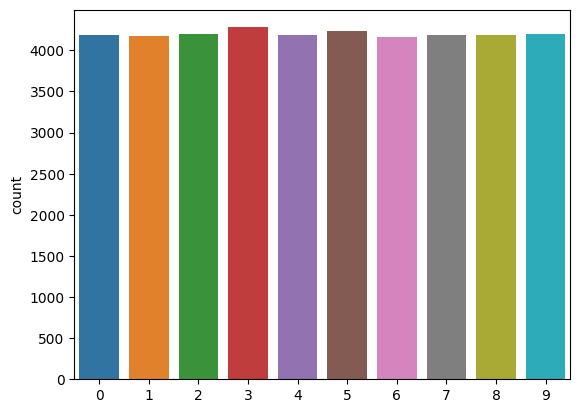

In [ ]:
# Plot distribution of each category
count_plot = sns.countplot(x=y_train)
plt.Xlabel = ' Category'

**Observations**
- We observe that the dataset appears to be quite balanced, each category is evenly distributed among the 42000 images.

- So accuracy should be a good evaluation metric for the model performance in this case study.

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
print('Shape of the first image: ', X_train[0].shape, '\n' \
      'Array of pixels for the first image of the training dataset: ', X_train[0])

Shape of the first image:  (32, 32) 
Array of pixels for the first image of the training dataset:  [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [ ]:
# Flattened the 2-D array into 1-D array and Normalize the train and the test dataset by dividing by 255.

X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

print('After reshape for train data:', X_train.shape,'\n'\
      'After reshape for test data:', X_test.shape)

After reshape for train data: (42000, 1024) 
After reshape for test data: (18000, 1024)


### **Normalize the train and the test data**

In [ ]:
# Normalize data: convert 0-255 to 0 - 1. Divid X_test and X_train by 255.
#Print the new shapes of the train and the test dataset.
X_train_norm = X_train/255
X_test_norm = X_test / 255



Print the shapes of Training and Test data

In [ ]:
print('Shape of normalized train data:', X_train_norm.shape, \
      'y train shape: ', y_train.shape,  '\n'\
      'Shape of normalized  test data:', X_test_norm.shape, \
      'ytest shape', y_test.shape)

Shape of normalized train data: (42000, 1024) y train shape:  (42000,) 
Shape of normalized  test data: (18000, 1024) ytest shape (18000,)


### **One-hot encode output**

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
# Creating one-hot encoded representation of target labels
# utility function - https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical
# to_categorical() function is also explained in the Neural Networks Module

y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)


**Observation:**
We created a one-hot encoded representation for the 10 target classes. Since there are 10 categories in target class and therefore, the output layer should have 10 neurons which will provide us with the probabilities of the input image belonging to each of those 10 classes.

## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [ ]:
# Clearing backend
# Resets all state generated by Keras. Keras manages a global state, which it uses to implement the Functional model-building API and to uniquify autogenerated layer names.

def clear_backend():
  backend.clear_session()
  print('Backend session clear complete!')

In [ ]:
# Method to reset the seed for random number generators in Numpy, Python's Random package, and TensorFlow
# to ensure we are able to reproduce these results every time we run the code.
def fix_seed_rdm_gen():
  np.random.seed(42)
  random.seed(42)
  tf.random.set_seed(42)
  print('Resetting the seed complete!')

In [ ]:
# Fixing the seed for random number generators in Numpy, Python's Random package, and TensorFlow
# to ensure we are able to reproduce these results every time we run the code.
fix_seed_rdm_gen()

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from keras.engine.training import optimizer

In [ ]:

def nn_model_1():
  hidden_nodes_1 = 64
  hidden_nodes_2 = 32
  output_node = 10
  hidden_activation_algo = 'relu'
  output_activation_algo = 'softmax'
  model_nn = Sequential()
  model_nn.add(Flatten(input_shape = (1024,)))

  #First dense/fully connected layer
  model_nn.add(Dense(hidden_nodes_1, activation = hidden_activation_algo))

  #Second dense/fully connected layer
  model_nn.add(Dense(hidden_nodes_2, activation = hidden_activation_algo))

  #Output layer
  model_nn.add(Dense(output_node,  activation = output_activation_algo))

  #Compile the model
  #Before the model is ready for training, the following setting are required
  # Optimizer — Used for updating the model based on the input data and its loss function.
  # Loss function — This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
  # Metrics — Used to monitor the training and testing steps.

  model_1.compile(optimizer = Adam(learning_rate=0.001),\
                   loss = 'categorical_crossentropy',\
                   metrics =['accuracy'])

  return model_nn


In [ ]:
#Create a model_1 with the following:

model_1 = nn_model_1()

#Summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


*Observations:*

**- Flatten Layer:**
The input shape to the layer is (1024). It does not have any parameters, so the number of parameters is 0.

**- Fully Connected First Dense Layer:**
Number of neurons: 64
Number of parameters: (1024x64)+(1x64): 65,536 + 64 = 65,600

[*Number of neurons in current layer x number of neurons in the previous layer + 1 x number of neurons in current layer(Bias)*]


**- Fully Connected Second Dense Layer:**
Number of neurons: 32
Number of parameters: (1024x32)+(1x32): 2048 + 32 = 2080

[*Number of neurons in current layer x number of neurons in the previous layer + 1 x number of neurons in current layer(Bias)*]


**- Output Layer:**
Number of neurons: 10
Number of parameters: (10x 32)+(1x10) = 330

[*Number of neurons in current layer x number of neurons in the previous layer( Here in the previous dense layer: 100) + 1 x number of neurons in current layer(Bias)*]

***Fitting the ANN Model on the train data.***

In [ ]:
#Train the model
#The following parameter were used to train data:
#validation split of 0.2,
#batch size = 128, verbose = 1, and epochs = 20.
#The output is stored the model building history to use later for visualization.

history_1 = model_1.fit(X_train_norm, y_train_encoded,\
            epochs=20,\
            validation_split=0.2,\
           # shuffle=True,
            batch_size=128,\
            verbose=1)

Epoch 1/20
263/263 [==============================] - 3s 6ms/step - loss: 2.2934 - accuracy: 0.1233 - val_loss: 2.2324 - val_accuracy: 0.1744
Epoch 2/20
263/263 [==============================] - 1s 5ms/step - loss: 2.0774 - accuracy: 0.2509 - val_loss: 1.9318 - val_accuracy: 0.3089
Epoch 3/20
263/263 [==============================] - 1s 6ms/step - loss: 1.8679 - accuracy: 0.3405 - val_loss: 1.7779 - val_accuracy: 0.3869
Epoch 4/20
263/263 [==============================] - 1s 5ms/step - loss: 1.6573 - accuracy: 0.4391 - val_loss: 1.5288 - val_accuracy: 0.4907
Epoch 5/20
263/263 [==============================] - 1s 5ms/step - loss: 1.4635 - accuracy: 0.5180 - val_loss: 1.4202 - val_accuracy: 0.5255
Epoch 6/20
263/263 [==============================] - 1s 5ms/step - loss: 1.3588 - accuracy: 0.5568 - val_loss: 1.3240 - val_accuracy: 0.5768
Epoch 7/20
263/263 [==============================] - 1s 5ms/step - loss: 1.2895 - accuracy: 0.5839 - val_loss: 1.2558 - val_accuracy: 0.6013
Epoch 

Notes:
With each Epoch the loss value is decreasing which indicates model is making accurate prediction on the train data. As observed, accuracy and validation accuracy increasing and at the end of iteration these two values are approximately the same 67%.

*loss*: this is the value of the cost function for training data.

### **Plot the Training and Validation Accuracies and write down your Observations.**

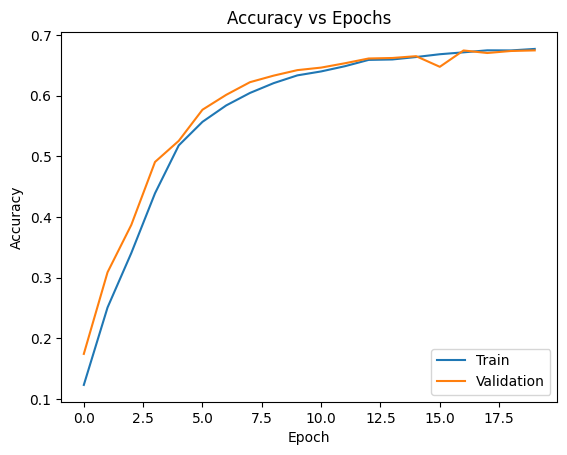

In [ ]:
#Graph here for ANN Model 1
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

**Observations:_______**

Th above plot that the model has perfomed well on the train and validation data, with a validation accuracy of 69%. We can modify the model to bring up the accuracy rate.

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Resetting the seed for random number generators in Numpy, Python's Random package, and TensorFlow
# to ensure we are able to reproduce these results every time we run the code.
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.layers import Dropout, BatchNormalization

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [ ]:
def nn_model_2():

  hidden_nodes_1 = 256
  hidden_nodes_2 = 128
  hidden_nodes_3 = 64
  hidden_nodes_4 = 64
  hidden_nodes_5 = 32
  output_node = 10
  drop_out = 0.2
  hidden_activation_algo = 'relu'
  output_activation_algo = 'softmax'
  model_nn = Sequential()
  model_nn.add(Flatten(input_shape = (1024,)))

  #First dense/fully connected layer
  model_nn.add(Dense(hidden_nodes_1, activation = hidden_activation_algo))

  #Second dense/fully connected layer
  model_nn.add(Dense(hidden_nodes_2, activation = hidden_activation_algo))

  # We will be switching 20% of neurons off randomly at each iteration to avoid overfitting
  model_nn.add(Dropout(drop_out))

 #Third dense/fully connected layer
  model_nn.add(Dense(hidden_nodes_3, activation = hidden_activation_algo))

 #Fourth dense/fully connected layer
  model_nn.add(Dense(hidden_nodes_4, activation = hidden_activation_algo))

 #Fifth dense/fully connected layer
  model_nn.add(Dense(hidden_nodes_5, activation = hidden_activation_algo))

  model_nn.add(BatchNormalization())

  #Output layer
  model_nn.add(Dense(output_node,  activation = output_activation_algo))

  #Compile the model
  #Before the model is ready for training, the following setting are required
  # Optimizer — Used for updating the model based on the input data and its loss function.
  # Loss function — This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
  # Metrics — Used to monitor the training and testing steps.

  model_2.compile(optimizer = Adam(learning_rate=0.0005),\
                   loss = 'categorical_crossentropy',\
                   metrics =['accuracy'])

  return model_nn

In [ ]:
#Create a model_2

model_2 = nn_model_2()
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2

In [ ]:
#Train the model - Fit on the train data with:
#validation split of 0.2,
#batch size = 128, verbose = 1, and epochs = 30.
#The output is stored the model building history to use later for visualization.

history_2 = model_2.fit(X_train_norm, y_train_encoded,\
            epochs=30,\
            validation_split=0.2,\
           # shuffle=True,
            batch_size=128,\
            verbose=1)

Epoch 1/30
263/263 [==============================] - 6s 17ms/step - loss: 2.3046 - accuracy: 0.1014 - val_loss: 2.3030 - val_accuracy: 0.0977
Epoch 2/30
263/263 [==============================] - 5s 18ms/step - loss: 2.3022 - accuracy: 0.1024 - val_loss: 2.2970 - val_accuracy: 0.1187
Epoch 3/30
263/263 [==============================] - 6s 21ms/step - loss: 2.2047 - accuracy: 0.1503 - val_loss: 2.0211 - val_accuracy: 0.2151
Epoch 4/30
263/263 [==============================] - 5s 20ms/step - loss: 1.9280 - accuracy: 0.2607 - val_loss: 1.7875 - val_accuracy: 0.3311
Epoch 5/30
263/263 [==============================] - 7s 25ms/step - loss: 1.7044 - accuracy: 0.3752 - val_loss: 1.5457 - val_accuracy: 0.4646
Epoch 6/30
263/263 [==============================] - 7s 26ms/step - loss: 1.5134 - accuracy: 0.4800 - val_loss: 1.4082 - val_accuracy: 0.5293
Epoch 7/30
263/263 [==============================] - 6s 21ms/step - loss: 1.4000 - accuracy: 0.5268 - val_loss: 1.3338 - val_accuracy: 0.5520

### **Plot the Training and Validation Accuracies and write down your Observations.**

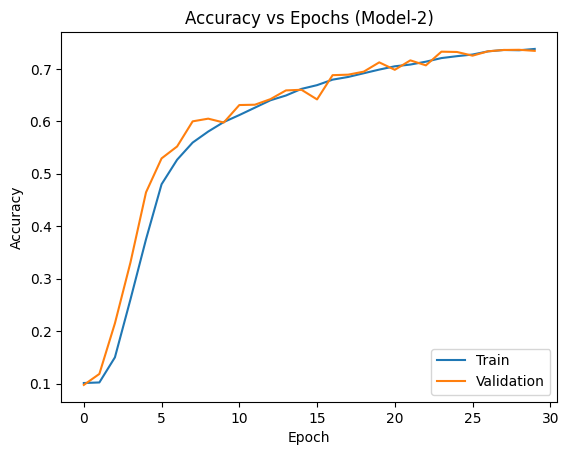

In [ ]:
#Graph here for Model 2
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Accuracy vs Epochs (Model-2)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

**Observations:_______**

The above plot shows that the model has perfomed well on the train and validation data, with a validation accuracy of 72%, which is better than model 1. Addition of 3 more dense layer, regularization using Dropout and adding BatchNormalziation improved the accuracy rate.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [ ]:
#Prediction based on model_2
test_pred = model_2.predict(X_test_norm)

#convert each entry of y_test to a single label from one-hot encoded
test_pred = np.argmax(test_pred, axis = -1)

563/563 [==============================] - 2s 3ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

              precision    recall  f1-score   support

           0       0.82      0.70      0.75      1814
           1       0.77      0.73      0.75      1828
           2       0.73      0.76      0.74      1803
           3       0.71      0.66      0.68      1719
           4       0.62      0.87      0.72      1812
           5       0.71      0.68      0.69      1768
           6       0.73      0.75      0.74      1832
           7       0.73      0.77      0.75      1808
           8       0.78      0.62      0.69      1812
           9       0.71      0.72      0.72      1804

    accuracy                           0.72     18000
   macro avg       0.73      0.72      0.72     18000
weighted avg       0.73      0.72      0.72     18000



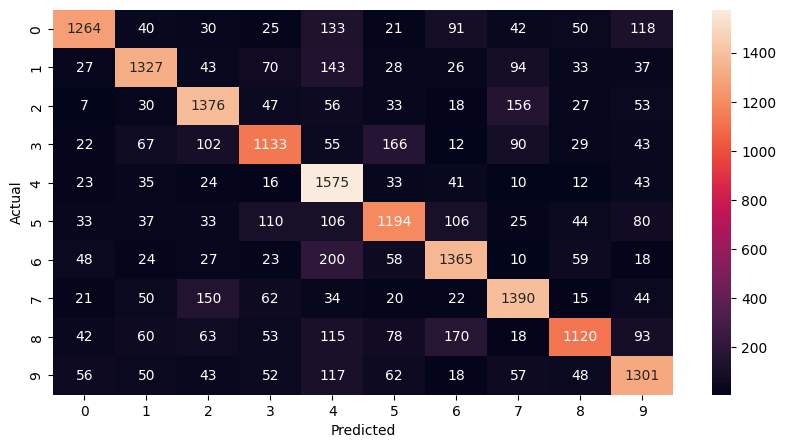

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, test_pred)) # actual value vs. predicted value
cm = confusion_matrix(y_test, test_pred)        # Create confusion matrix

plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Final Observations:__________**

We observe that most of the classes are predicted correctly.
The most misclassification occurs with the following:
 - Digits 6, 8 and 9 which are predicted as 4
 - Digit 3 which is predicted as 5
 - Digit 2 and 7 which are predicted as 7 and 2 respectively.

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [ ]:
# Open the file as read only

h5data = h5py.File('/content/drive/MyDrive/MIT-Data Science/Elective Project/SVHN_single_grey1.h5', 'r')

list(h5data.values())

[<HDF5 dataset "X_test": shape (18000, 32, 32), type "<f4">,
 <HDF5 dataset "X_train": shape (42000, 32, 32), type "<f4">,
 <HDF5 dataset "X_val": shape (60000, 32, 32), type "<f4">,
 <HDF5 dataset "y_test": shape (18000,), type "|u1">,
 <HDF5 dataset "y_train": shape (42000,), type "|u1">,
 <HDF5 dataset "y_val": shape (60000,), type "|u1">]

In [ ]:
# Load the training dataset

X_train_cn = h5data['X_train'][:]

y_train_cn = h5data['y_train'][:]

# Load the test dataset

X_test_cn = h5data['X_test'][:]

y_test_cn = h5data['y_test'][:]


# Close this file

h5data.close()

Check the number of images in the training and the testing dataset.

In [ ]:
#number of images in the training and the testing dataset
print("Number of images stored in the trining dataset = ", len(X_train_cn),'\n'\
      'Number of images stored in the testing dataset = ', len(X_test_cn))
print("Additional information on shape of traing dataset = ", X_train_cn.shape, '\n'\
      "Additional information on shape of test dataset = ", X_test_cn.shape)

Number of images stored in the trining dataset =  42000 
Number of images stored in the testing dataset =  18000
Additional information on shape of traing dataset =  (42000, 32, 32) 
Additional information on shape of test dataset =  (18000, 32, 32)


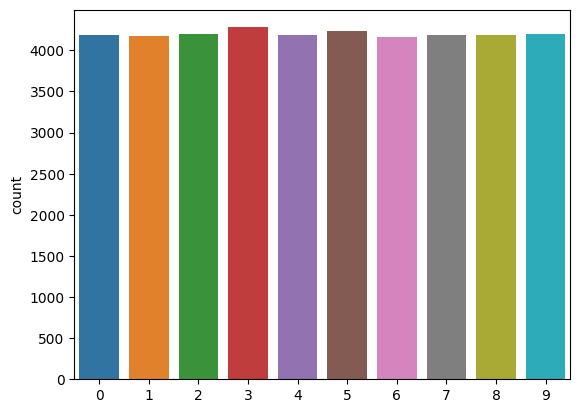

In [ ]:
# Plot distribution of each category
count_plot = sns.countplot(x=y_train_cn)

**Observation:**


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
print("Shape information of training dataset = ", X_train_cn[0].shape)
print('Array of pixels for the first imaage in training dataset =', X_train_cn[0])

Shape information of training dataset =  (32, 32)
Array of pixels for the first imaage in training dataset = [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [ ]:
X_train_cn = X_train_cn.reshape(X_train.shape[0], 32, 32, 1)

X_test_cn = X_test_cn.reshape(X_test.shape[0], 32, 32, 1)

Normalize inputs from 0-255 to 0-1

In [ ]:
X_train_cn_norm = X_train_cn/255
X_test_cn_norm = X_test_cn/255

Print New shape of Training and Test

In [ ]:
print("Shape information of normalized Training dataset = ", X_train_cn_norm.shape, y_train_cn.shape)
print("Shape information of normalized Testing dataset = ", X_test_cn_norm.shape, y_test_cn.shape)
print('Array of pixels for the first image in normalized training dataset =', X_train_cn_norm[0])

Shape information of normalized Training dataset =  (42000, 32, 32, 1) (42000,)
Shape information of normalized Testing dataset =  (18000, 32, 32, 1) (18000,)
Array of pixels for the first image in normalized training dataset = [[[0.12968785]
  [0.11866706]
  [0.10530196]
  ...
  [0.2801847 ]
  [0.2283153 ]
  [0.16860352]]

 [[0.09893451]
  [0.10020902]
  [0.1175549 ]
  ...
  [0.4432192 ]
  [0.40534863]
  [0.33056822]]

 [[0.10304902]
  [0.08868118]
  [0.15873058]
  ...
  [0.44432473]
  [0.47754902]
  [0.45263842]]

 ...

 [[0.11196157]
  [0.14200786]
  [0.17678471]
  ...
  [0.09465059]
  [0.09840274]
  [0.10219726]]

 [[0.15072627]
  [0.10381687]
  [0.09126157]
  ...
  [0.11023294]
  [0.11556196]
  [0.11790627]]

 [[0.19724864]
  [0.10226392]
  [0.0942702 ]
  ...
  [0.19477727]
  [0.19942354]
  [0.20799099]]]


### **One-hot encode the labels in the target variable y_train and y_test.**

In [ ]:
# Creating one-hot encoded representation of target labels
# utility function - https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical
# to_categorical() function is also explained in the Neural Networks Module

y_train_encoded = tf.keras.utils.to_categorical(y_train_cn)
y_test_encoded = tf.keras.utils.to_categorical(y_test_cn)

print('Shape of Target Train and Test data: ', y_train_encoded.shape, y_test_encoded.shape)
for i in range(2):
  print(f'Value of Train data in index[{i}]:', y_train_cn[i])
  print(f'Value of encoded Train data in index[{i}]', y_train_encoded[i])

Shape of Target Train and Test data:  (42000, 10) (18000, 10)
Value of Train data in index[0]: 2
Value of encoded Train data in index[0] [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Value of Train data in index[1]: 6
Value of encoded Train data in index[1] [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


**Observation:**


## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [ ]:
#Reset all state generated by Keras
clear_backend()

#Call method for Resetting the seed for random number generators in Numpy, Python's Random package, and TensorFlow
# to ensure we are able to reproduce these results every time we run the code.
fix_seed_rdm_gen()

Backend session clear complete!
Resetting the seed complete!


### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

In [ ]:
from tensorflow.keras.layers import Conv2D, LeakyReLU, MaxPooling2D

### **Build and train a CNN model as per the above mentioned architecture.**

In [ ]:
def cnn_model_1():
# Adding first conv layer with 16 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of MNIST images
  input_shp = (32, 32, 1)
  model = Sequential()
  #First layer - Convolutional layer with 16 filters and the kernel size of 3x3, and input shape = (32, 32, 1)
  model.add(Conv2D(16, (3, 3), padding = 'same',  input_shape=input_shp))

  # add LeakyRelu with slope = 0.1
  model.add(LeakyReLU(alpha=0.1))

 #Add Second layer - Convolutional layer with 32 filters and the kernel size of 3x3 with 'same' padding
  model.add(Conv2D(32, (3, 3), padding="same"))
 # add LeakyRelu with slope = 0.1
  model.add(LeakyReLU(alpha=0.1))

  #Add Max-pooling
  model.add(MaxPooling2D(2, 2))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
  model.add(Flatten())

#Add a dense layer with 32 nodes
  model.add(Dense(32))

#Add a LeakyRelu layer with the slope equal to 0.1
  model.add(LeakyReLU(alpha=0.1))

#Add the final output layer number of classes = 10 and 'softmax' as the activation function
  model.add(Dense(10, activation='softmax'))

#Compile the model with the loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'.
  model.compile(optimizer= Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [ ]:
# Call model
model_cn_1 = cnn_model_1()
model_cn_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                        

****Observations:****

***First Conv2D Layer***
The input shape to the Conv2D layer: (32,32,1)
The Size of the Filter: 3x3
The Number of Filters: 16
The Number of parameters: (3x3x1+1)x 16 = 160
(width of filter in current layer x height of filter in current layer x number of filters in previous layer + bias) x number of filters in current layer

***Max Pooling Layer***
Pooling has no trainable parameters, so the number of parameters: 0

***Flatten***
It does not have any trainable parameters, so the number of parameters: 0

***Fully Connected Dense Layer***
Number of neurons: 32
Number of parameters: 262176
[*Number of neurons in current layer x number of neurons in the previous layer (Here in max pooling layer: 14x14x16) + 1 x number of neurons in current layer (Bias)*]

***Output Layer***
Number of neurons: 10
Number of parameters: (10x 32)+(1x10)= 330
Number of neurons in current layer x number of neurons in the previous layer (Here in the previous dense layer: 128) + 1 x number of neurons in current layer(Bias)

### **Plot the Training and Validation Accuracies and Write your observations.**

In [ ]:
history_cn_1 = model_cn_1.fit(x = X_train_cn_norm, y = y_train_encoded, validation_split = 0.2, batch_size= 32, verbose= 1, epochs= 20)

Epoch 1/20
1050/1050 [==============================] - 111s 105ms/step - loss: 1.1274 - accuracy: 0.6303 - val_loss: 0.6497 - val_accuracy: 0.8087
Epoch 2/20
1050/1050 [==============================] - 99s 94ms/step - loss: 0.5352 - accuracy: 0.8475 - val_loss: 0.5254 - val_accuracy: 0.8448
Epoch 3/20
1050/1050 [==============================] - 97s 93ms/step - loss: 0.4416 - accuracy: 0.8700 - val_loss: 0.5049 - val_accuracy: 0.8532
Epoch 4/20
1050/1050 [==============================] - 90s 86ms/step - loss: 0.3781 - accuracy: 0.8888 - val_loss: 0.4486 - val_accuracy: 0.8739
Epoch 5/20
1050/1050 [==============================] - 87s 83ms/step - loss: 0.3330 - accuracy: 0.9004 - val_loss: 0.4592 - val_accuracy: 0.8717
Epoch 6/20
1050/1050 [==============================] - 90s 86ms/step - loss: 0.2944 - accuracy: 0.9115 - val_loss: 0.4640 - val_accuracy: 0.8735
Epoch 7/20
1050/1050 [==============================] - 91s 86ms/step - loss: 0.2622 - accuracy: 0.9216 - val_loss: 0.4506

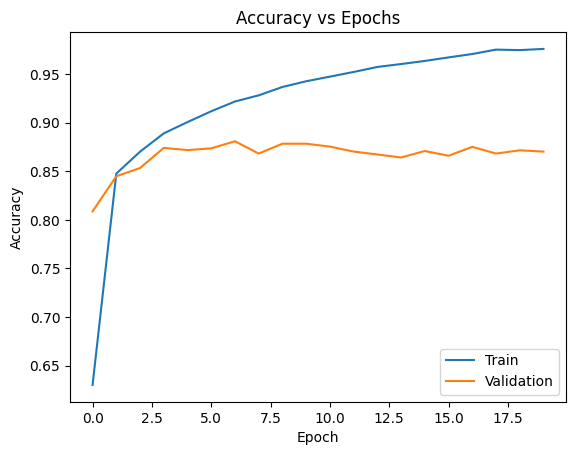

In [ ]:
#Graph here for CNN Model 1
plt.plot(history_cn_1.history['accuracy'])
plt.plot(history_cn_1.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

The CNN model_1 has not performed better on validation data. The validation accuracy rate of 85%.

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

In [ ]:
#Reset all state generated by Keras
clear_backend()

#Call method for Resetting the seed for random number generators in Numpy, Python's Random package, and TensorFlow
# to ensure we are able to reproduce these results every time we run the code.
fix_seed_rdm_gen()

Backend session clear complete!
Resetting the seed complete!


### **Build and train the second CNN model as per the above mentioned architecture.**

In [ ]:
def cnn_model_2():
# Adding first conv layer with 16 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of MNIST images
  input_shp = (32, 32, 1)
  model = Sequential()
  #First layer - Convolutional layer with 16 filters and the kernel size of 3x3, and input shape = (32, 32, 1)
  model.add(Conv2D(16, (3, 3), padding = 'same',  input_shape=input_shp))

  # add LeakyRelu with slope = 0.1
  model.add(LeakyReLU(alpha=0.1))

 #Add Second layer - Convolutional layer with 32 filters and the kernel size of 3x3 with 'same' padding
  model.add(Conv2D(32, (3, 3), padding="same"))
 # add LeakyRelu with slope = 0.1
  model.add(LeakyReLU(alpha=0.1))
  #Add Max-pooling layer with a pool size of 2x2
  model.add(MaxPooling2D(2, 2))
  # Add a BatchNormalization layer
  model.add(BatchNormalization())

#Third Convolutional layer with 32 filters and the kernel size of 3x3 with 'same' padding
  model.add(Conv2D(32, (3, 3), padding="same"))
# Add a LeakyRelu layer with the slope equal to 0.1
  model.add(LeakyReLU(alpha=0.1))

# Fourth Convolutional layer 64 filters and the kernel size of 3x3 with 'same' padding
  model.add(Conv2D(64, (3, 3), padding="same"))
# Add a LeakyRelu layer with the slope equal to 0.1
  model.add(LeakyReLU(alpha=0.1))
# Add a max-pooling layer with a pool size of 2x2
  model.add(MaxPooling2D(2, 2))
# Add a BatchNormalization layer
  model.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
  model.add(Flatten())

#Add a dense layer with 32 nodes
  model.add(Dense(32))
#Add a LeakyRelu layer with the slope equal to 0.1
  model.add(LeakyReLU(alpha=0.1))
#Add a Dropout layer
  model.add(Dropout(0.5))

#Add the final output layer number of classes = 10 and 'softmax' as the activation function
  model.add(Dense(10, activation='softmax'))

#Compile the model with the loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'.
  model.compile(optimizer= Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [ ]:
model_cn_2 = cnn_model_2()
print(model_cn_2.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                          

**Observations**


In [ ]:
#Fit the model on the train data with a validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30.
history_cn_2 = model_cn_2.fit(x = X_train_cn_norm, y = y_train_encoded, validation_split = 0.2, batch_size= 128, verbose= 1, epochs= 30)

Epoch 1/30
263/263 [==============================] - 179s 676ms/step - loss: 1.3271 - accuracy: 0.5491 - val_loss: 1.8763 - val_accuracy: 0.3475
Epoch 2/30
263/263 [==============================] - 180s 684ms/step - loss: 0.6722 - accuracy: 0.7940 - val_loss: 0.5646 - val_accuracy: 0.8446
Epoch 3/30
263/263 [==============================] - 178s 678ms/step - loss: 0.5530 - accuracy: 0.8310 - val_loss: 0.4333 - val_accuracy: 0.8739
Epoch 4/30
263/263 [==============================] - 164s 622ms/step - loss: 0.4921 - accuracy: 0.8483 - val_loss: 0.4754 - val_accuracy: 0.8651
Epoch 5/30
263/263 [==============================] - 164s 623ms/step - loss: 0.4399 - accuracy: 0.8624 - val_loss: 0.3768 - val_accuracy: 0.8963
Epoch 6/30
263/263 [==============================] - 155s 589ms/step - loss: 0.4033 - accuracy: 0.8764 - val_loss: 0.3743 - val_accuracy: 0.8935
Epoch 7/30
263/263 [==============================] - 157s 597ms/step - loss: 0.3876 - accuracy: 0.8813 - val_loss: 0.3795 -

### **Plot the Training and Validation accuracies and write your observations.**

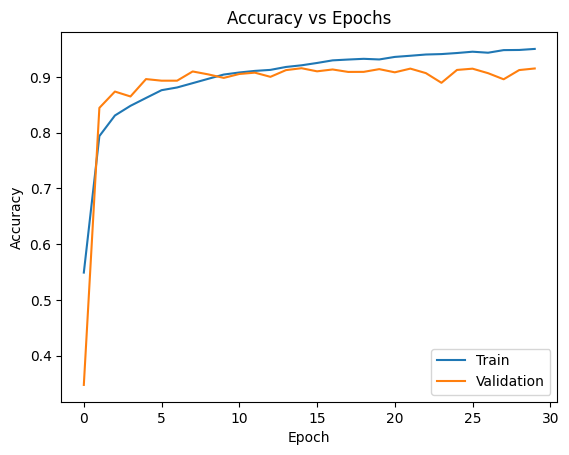

In [ ]:
#Graph here for CNN Model 2
plt.plot(history_cn_2.history['accuracy'])
plt.plot(history_cn_2.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

**Observations:________**

The CNN model_2 has performed better on train and validation data with validation accuracy rate of 90%.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [ ]:
#Prediction based on model_2
test_pred_cn = model_cn_2.predict(X_test_cn_norm)

#convert each entry of y_test to a single label from one-hot encoded
test_pred_cn = np.argmax(test_pred_cn, axis = -1)

563/563 [==============================] - 24s 43ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
print("Expected target categories:", y_test_cn)
print("Converted from one-hot encoded target categories:", test_pred_cn)


Expected target categories: [1 7 2 ... 7 9 2]
Converted from one-hot encoded target categories: [1 7 2 ... 7 3 2]


### **Write your final observations on the performance of the model on the test data.**

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1814
           1       0.89      0.93      0.91      1828
           2       0.94      0.90      0.92      1803
           3       0.90      0.89      0.89      1719
           4       0.94      0.92      0.93      1812
           5       0.90      0.92      0.91      1768
           6       0.92      0.88      0.90      1832
           7       0.92      0.94      0.93      1808
           8       0.93      0.88      0.90      1812
           9       0.90      0.92      0.91      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



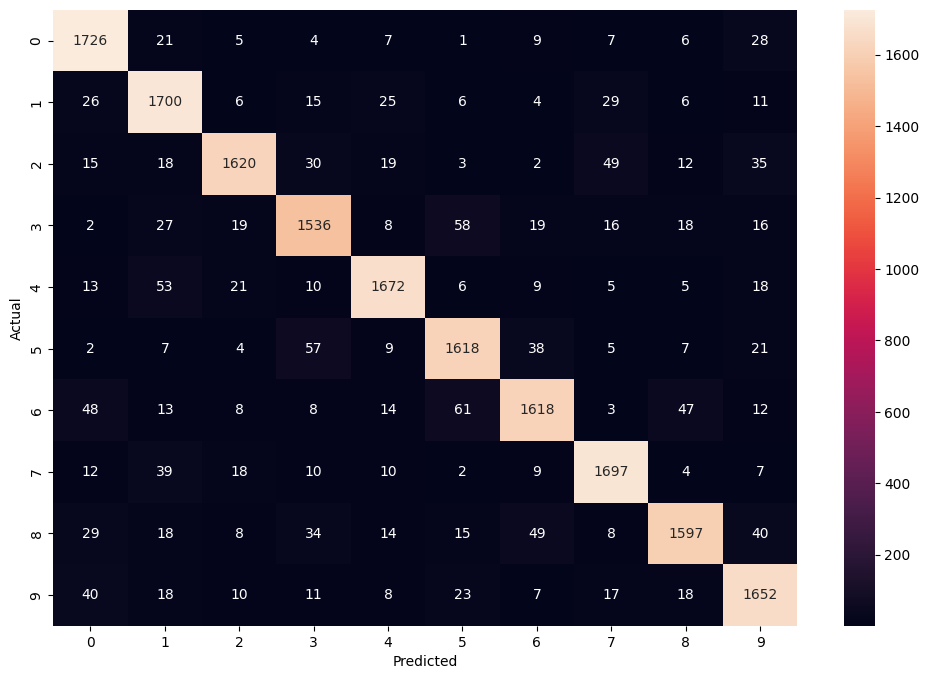

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test_cn, test_pred_cn)) # actual value vs. predicted value
cm = confusion_matrix(y_test_cn, test_pred_cn)        # Create confusion matrix

plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Final Observations:_________**


*   Majority of the images were classified accurately that can be dedicated by the Recall, Precision and average accuracy rate which all are approximately 91%
*   A higher number of missclassification are observed for digits 5 and 3, and 5 and 6.



**Comparing the observation between ANN and CNN**

The results of CNN model 2 are more accurate 91% compared to ANN model 2 which has the accuracy of 72%.

The use of multiple convolution layers for feature extraction in addiontion of dense layer has an added advantage over ANN model where we used five dense layer, dropout and batch normalization which were similar to the CNN model.

In addition CNN model is computionally more efficient than ANN model. For ANN model we used 310,122 Trainable params, whereas CNN model used only 164,170 Trainable params.